# **Santander Product Recommendation**

-Link: https://www.kaggle.com/competitions/santander-product-recommendation/overview
    
- The point of the challenge is to predict what products current customers would buy within the upcoming month based on their past behavior and that of similar customers.
    
- The dataset is a longitudinal record of Santander bank customers' product holdings and behaviors over time. The prediction task is focused on anticipating additional products that customers will acquire by the end of the dataset period, based on their previous behavior and product holding. This involves leveraging historical data to train machine learning models for product recommendation or prediction purposes.

# **Data Loading**

In [2]:
import pandas as pd

test_file_path = '/content/test_ver2.csv'

#load the dataset
test_data = pd.read_csv(test_file_path)

#display basic information
print("Shape of test dataset:",test_data.shape)

#display the first few rows
print("\nFirst few rows of test dataset:")
print(test_data.head())

<ipython-input-2-f6c4050faa9d>:6: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(test_file_path)


Shape of test dataset: (254871, 24)

First few rows of test dataset:
   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2016-06-28     15889            F              ES    V   56  1995-01-16   
1  2016-06-28   1170544            N              ES    H   36  2013-08-28   
2  2016-06-28   1170545            N              ES    V   22  2013-08-28   
3  2016-06-28   1170547            N              ES    H   22  2013-08-28   
4  2016-06-28   1170548            N              ES    H   22  2013-08-28   

   ind_nuevo  antiguedad  indrel  ... indext  conyuemp canal_entrada indfall  \
0          0         256       1  ...      N         N           KAT       N   
1          0          34       1  ...      N       NaN           KAT       N   
2          0          34       1  ...      N       NaN           KHE       N   
3          0          34       1  ...      N       NaN           KHE       N   
4          0          34       1  ...      N       NaN        

In [3]:
import pandas as pd

# Path to dataset file
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)

# Get the number of rows (data points) and features (columns) using the shape attribute
num_rows, num_features = df.shape

# Subtract 1 from num_features to exclude the index column (if present)
num_features -= 1 if 'Unnamed: 0' in df.columns else 0

print("Number of rows (data points):", num_rows)
print("Number of features (columns):", num_features)


Number of rows (data points): 254871
Number of features (columns): 24


<ipython-input-3-60e7d4e162dc>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
import pandas as pd

# Path to dataset file
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)

# Check for missing values (NaNs) in the dataset
missing_values = df.isna().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])


<ipython-input-4-06b49bcba800>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Columns with missing values:
ult_fec_cli_1t    254559
conyuemp          254870
canal_entrada          9
cod_prov             259
nomprov              259
segmento              15
dtype: int64


In [5]:
import pandas as pd
import numpy as np

# Path to your dataset file (CSV, Excel, etc.)
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)

# Function to identify outliers using IQR method
def find_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

# Initialize lists to store feature information
feature_names = []
feature_type = []
value_range = []
num_missing_values = []
has_outliers = []

# Iterate over each column (feature) in the DataFrame
for col in df.columns:
    # Determine feature type (categorical or numerical)
    if df[col].dtype == 'object':
        feature_type.append('Categorical')
        # Get unique values for categorical features
        values = ', '.join(df[col].dropna().unique())
        value_range.append(values)
    else:
        feature_type.append('Numerical')
        # Get value range for numerical features
        min_value = df[col].min()
        max_value = df[col].max()
        value_range.append(f'{min_value} - {max_value}')

    # Count missing values for each feature
    num_missing = df[col].isna().sum()
    num_missing_values.append(num_missing)

    # Check for outliers using IQR method for numerical features
    if df[col].dtype != 'object':  # Check if feature is numerical
        outliers = find_outliers(df[col])
        if outliers.any():
            has_outliers.append('Yes')
        else:
            has_outliers.append('No')
    else:
        has_outliers.append('N/A')  # No outliers check for categorical features

    # Store feature name
    feature_names.append(col)

# Create a DataFrame to summarize feature information
feature_summary = pd.DataFrame({
    'Feature': feature_names,
    'Type': feature_type,
    'Value Range': value_range,
    'Missing Values': num_missing_values,
    'Outliers': has_outliers
})

# Display the feature summary table
print("Feature Summary:")
print(feature_summary)


<ipython-input-5-d015b3edd846>:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Feature Summary:
                  Feature         Type  \
0              fecha_dato  Categorical   
1                ncodpers    Numerical   
2            ind_empleado  Categorical   
3         pais_residencia  Categorical   
4                    sexo  Categorical   
5                     age    Numerical   
6              fecha_alta  Categorical   
7               ind_nuevo    Numerical   
8              antiguedad    Numerical   
9                  indrel    Numerical   
10         ult_fec_cli_1t  Categorical   
11            indrel_1mes    Numerical   
12            tiprel_1mes  Categorical   
13                indresi  Categorical   
14                 indext  Categorical   
15               conyuemp  Categorical   
16          canal_entrada  Categorical   
17                indfall  Categorical   
18                tipodom    Numerical   
19               cod_prov    Numerical   
20                nomprov  Categorical   
21  ind_actividad_cliente    Numerical   
22               

<ipython-input-7-9640c96c51da>:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


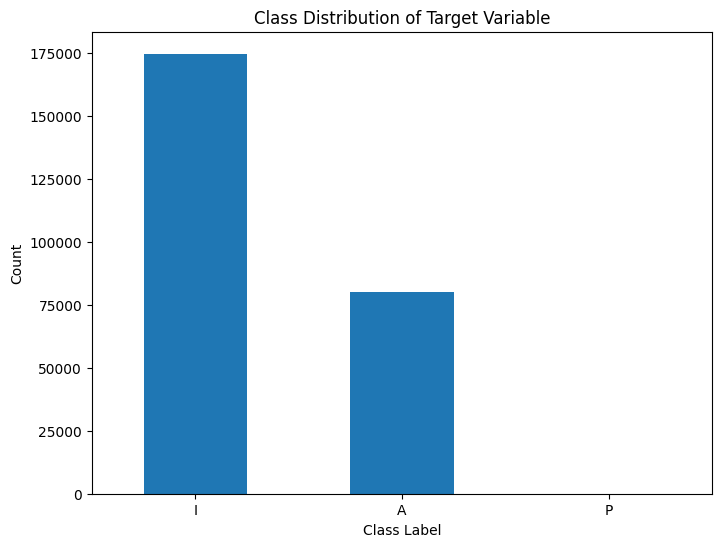

Class Distribution (Percentage):
tiprel_1mes
I    68.560174
A    31.437865
P     0.001962
Name: count, dtype: float64

Imbalanced Classes:
tiprel_1mes
P    0.001962
Name: count, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your dataset file (CSV, Excel, etc.)
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)

# Identify the target variable (dependent variable)
target_variable = 'tiprel_1mes'

# Count the number of instances for each class in the target variable
class_counts = df[target_variable].value_counts()

# Plot a bar chart to visualize class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', rot=0)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

# Calculate the percentage distribution of each class
class_percentages = class_counts / class_counts.sum() * 100
print("Class Distribution (Percentage):")
print(class_percentages)

# Check for class imbalance based on thresholds (e.g., if one class is less than 10% of the total)
threshold = 10  # Adjust threshold percentage as needed

imbalanced_classes = class_percentages[class_percentages < threshold]
if not imbalanced_classes.empty:
    print("\nImbalanced Classes:")
    print(imbalanced_classes)
else:
    print("\nNo significant class imbalance detected.")


In [9]:
import pandas as pd

# Path to your dataset file (CSV, Excel, etc.)
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)  # Use appropriate function for other file formats (e.g., pd.read_excel() for Excel files)

# Identify the target variable (dependent variable)
target_variable = 'tiprel_1mes'

# Check unique values in the target variable
unique_values = df[target_variable].unique()

# Display unique values to interpret encoding
print("Unique values in the target variable:")
print(unique_values)

# Interpret target variable encoding
if len(unique_values) == 2 and all(val in [0, 1] for val in unique_values):
    print("Binary encoded target variable (0 and 1)")
elif all(isinstance(val, str) for val in unique_values):
    print("Categorical labels encoding")
else:
    print("Unknown encoding. Further inspection may be required.")


Unique values in the target variable:
['A' 'I' 'P']
Categorical labels encoding


<ipython-input-9-fe84665b8709>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Use appropriate function for other file formats (e.g., pd.read_excel() for Excel files)


The unique values in te target variable are A,I,P

# **Data Visualization**

<ipython-input-10-b3f02d4f0c45>:8: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Use appropriate function for other file formats (e.g., pd.read_excel() for Excel files)


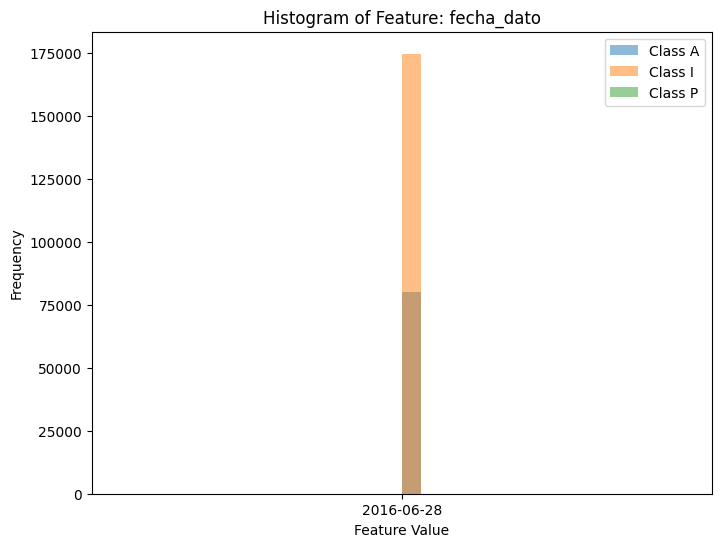

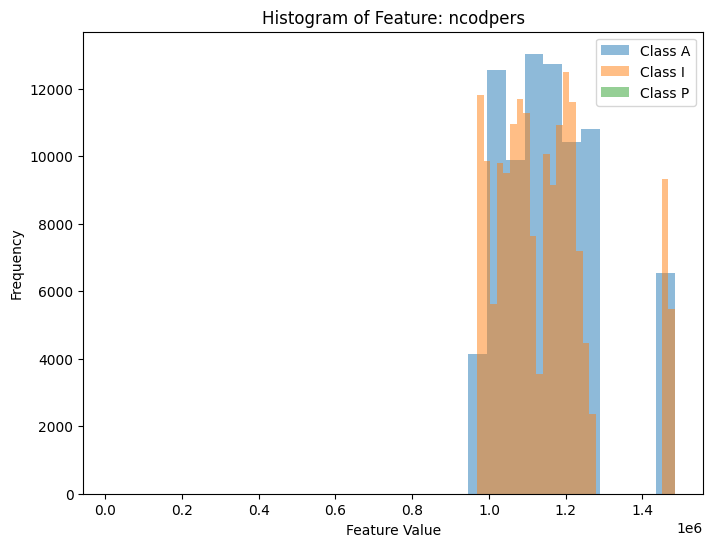

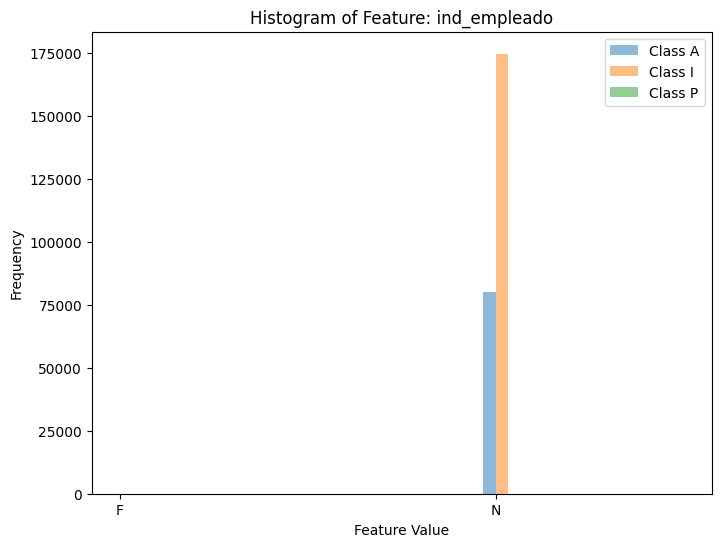

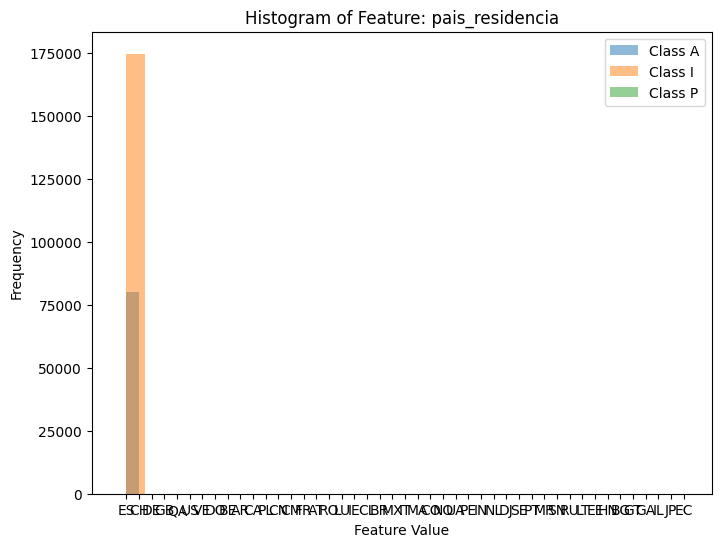

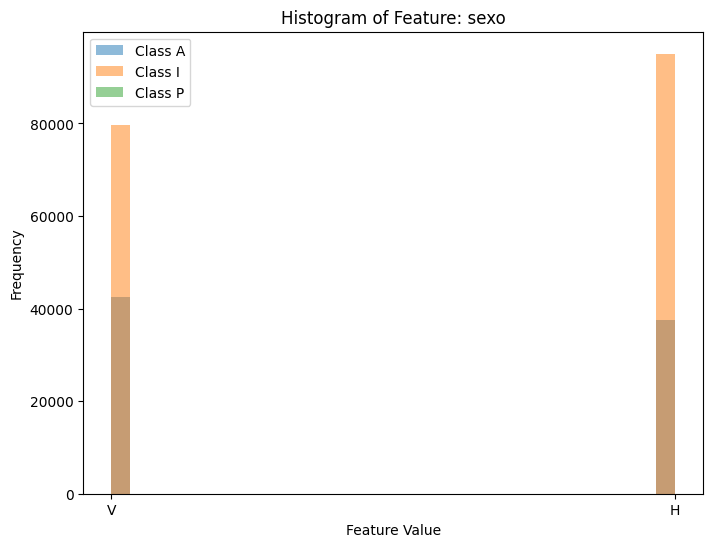

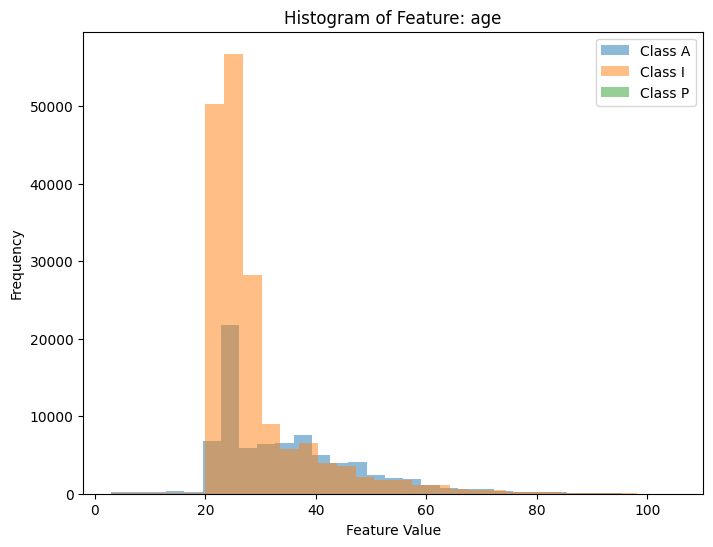

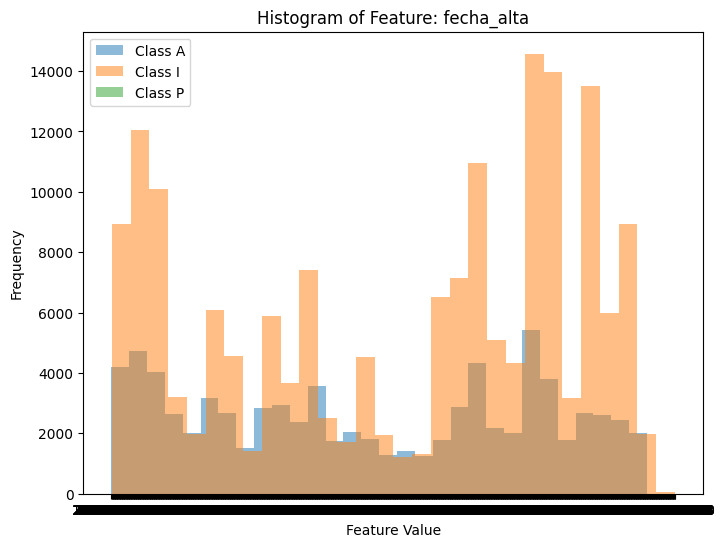

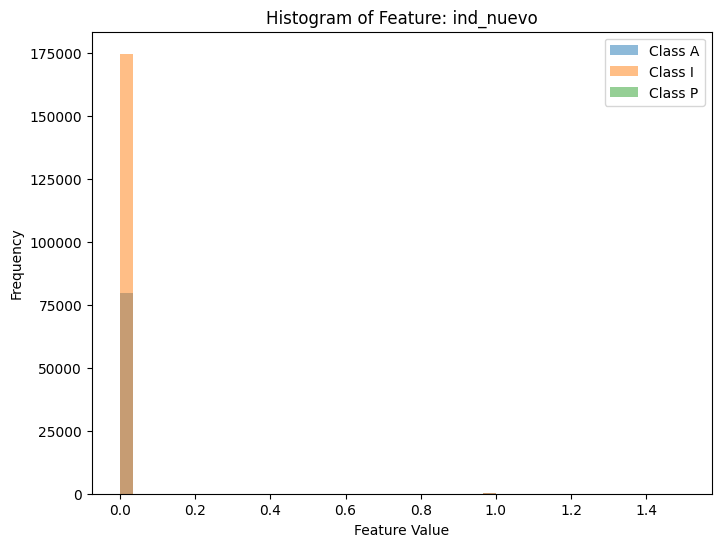

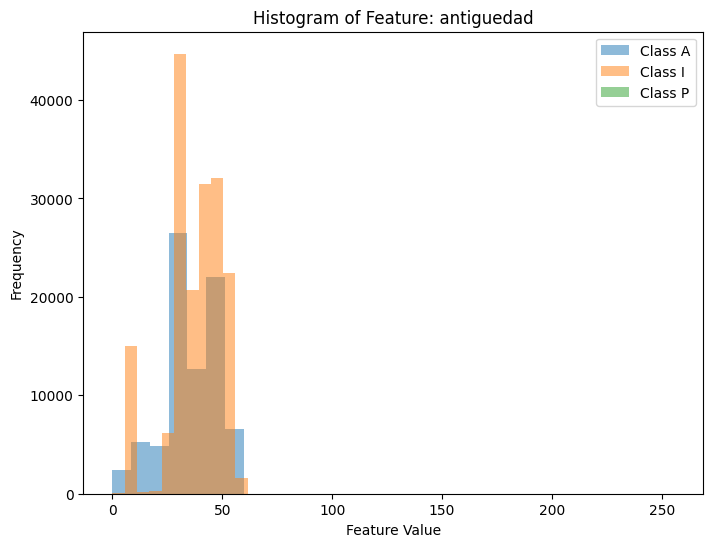

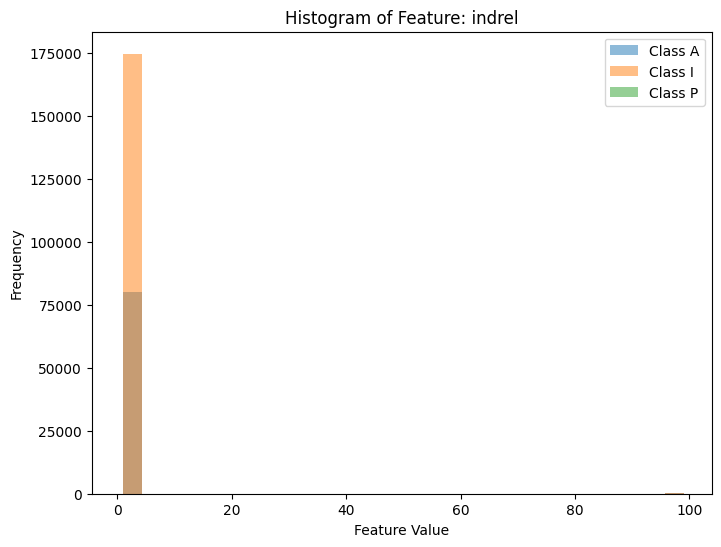

TypeError: 'value' must be an instance of str or bytes, not a float

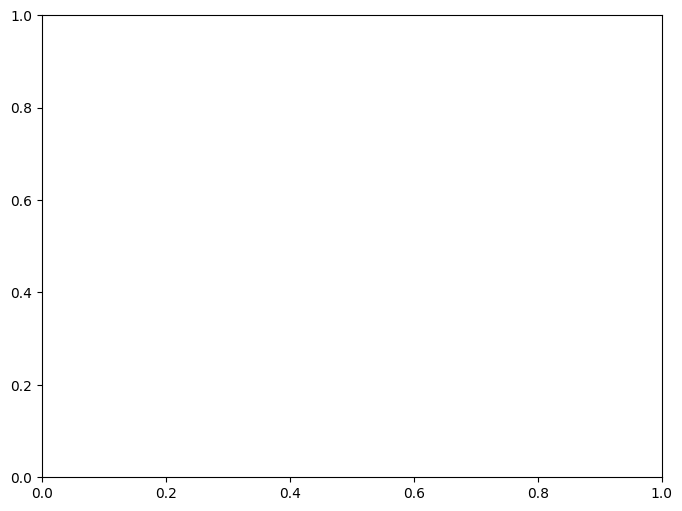

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to your dataset file (CSV, Excel, etc.)
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)  # Use appropriate function for other file formats (e.g., pd.read_excel() for Excel files)

# Identify the target variable (dependent variable)
target_variable = 'tiprel_1mes'

# Get unique class labels from the target variable
class_labels = df[target_variable].unique()

# Split the dataset by class label
class_datasets = {label: df[df[target_variable] == label] for label in class_labels}

# Plot histograms for each feature by class label
for feature in df.columns:
    if feature != target_variable:  # Skip the target variable column
        plt.figure(figsize=(8, 6))
        for label, class_df in class_datasets.items():
            plt.hist(class_df[feature], bins=30, alpha=0.5, label=f'Class {label}')
        plt.title(f'Histogram of Feature: {feature}')
        plt.xlabel('Feature Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


In [11]:
import pandas as pd

# Path to your dataset file (CSV, Excel, etc.)
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)  # Use appropriate function for other file formats (e.g., pd.read_excel() for Excel files)

# Identify the target variable (dependent variable)
target_variable = 'tiprel_1mes'

# Get unique class labels from the target variable
class_labels = df[target_variable].unique()

# Split the dataset by class label
class_datasets = {label: df[df[target_variable] == label] for label in class_labels}

# Function to summarize categorical feature distributions
def summarize_categorical_feature(feature):
    feature_summary = pd.DataFrame(index=df[feature].unique(), columns=class_labels)

    for label, class_df in class_datasets.items():
        class_counts = class_df[feature].value_counts(normalize=True) * 100  # Convert counts to percentage
        feature_summary[label] = class_counts

    return feature_summary

# Example: Summarize categorical feature 'categorical_feature_name'
categorical_feature_name = 'fecha_dato'  # Replace with your categorical feature name
categorical_feature_summary = summarize_categorical_feature(categorical_feature_name)

# Display the summarized table
print(f"Summary of '{categorical_feature_name}' by Class Label:")
print(categorical_feature_summary)


<ipython-input-11-e61eca9d04be>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Use appropriate function for other file formats (e.g., pd.read_excel() for Excel files)


Summary of 'fecha_dato' by Class Label:
                A      I      P
2016-06-28  100.0  100.0  100.0


A histogram looks more promising due to more data being showcased

# **Data Cleaning and Preperation for Machine Learning**

In [12]:
# Check for missing values in each feature
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          0
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           254559
indrel_1mes                   0
tiprel_1mes                   0
indresi                       0
indext                        0
conyuemp                 254870
canal_entrada                 9
indfall                       0
tipodom                       0
cod_prov                    259
nomprov                     259
ind_actividad_cliente         0
renta                         0
segmento                     15
dtype: int64


In [14]:
import pandas as pd

# Path to your dataset file (CSV, Excel, etc.)
file_path = '/content/test_ver2.csv'

# Load the dataset into a DataFrame using pandas
df = pd.read_csv(file_path)

# Display the number of missing values in each column
print("Missing Values (Before):")
print(df.isnull().sum())

# Remove rows with any missing values
df_cleaned = df.dropna()

# Display the number of missing values after removal
print("\nMissing Values (After):")
print(df_cleaned.isnull().sum())

# Optionally, save the cleaned dataset to a new file
cleaned_file_path = 'cleaned_dataset.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)


<ipython-input-14-174f03315a4e>:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Missing Values (Before):
fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          0
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           254559
indrel_1mes                   0
tiprel_1mes                   0
indresi                       0
indext                        0
conyuemp                 254870
canal_entrada                 9
indfall                       0
tipodom                       0
cod_prov                    259
nomprov                     259
ind_actividad_cliente         0
renta                         0
segmento                     15
dtype: int64

Missing Values (After):
fecha_dato               0.0
ncodpers                 0.0
ind_empleado             0.0
pais_residencia          0.0
sexo                     0.0
age                     